In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
#Parameter setup
road_length =100   #Length of the road
spead_max =5        #Maximum　Speed
car_density  = 0.3   #Random Slowdown Chance
steps =200          #Simulation Steps
p_slow = 0.2        #The probability of randomly decelerating

In [3]:
# Initialize (-1 is an empty cell)
num_cars = int(road_length * p_slow  )
road = -np.ones(road_length, dtype=int)
car_positions = np.random.choice(road_length, num_cars, replace=False)
road[car_positions] = np.random.randint(0, spead_max + 1, size=num_cars)

In [4]:
# Space-time data
space_time = np.zeros((steps, road_length), dtype=int)
road_history = []


### Speed Update Rule (Acceleration Step)

The speed of vehicle *i* is updated at time *t* as follows:

$$
v_i(t+1) = \min \left\{ v_i(t) + 1,\ v_{\text{max}} \right\}
$$

- $ v_{i}(t)$: Speed of vehicle *i* at time \( t \)
- $v_i(t+1)$: Speed at the next time \( t+1 \)  
- $v_{\text{max}}$: Maximum speed of the vehicle

This rule expresses the condition that "if it can still accelerate, accelerate by 1, but do not exceed the maximum speed."



In [5]:
# Simulation
for t in range(steps):
    space_time[t] = road >= 0
    road_history.append(road >= 0)

    new_road = -np.ones(road_length, dtype=int)

    for i in range(road_length):
        if road[i] >= 0:
            v = road[i]
            #Rule1 acceleration
            v = min(v + 1, spead_max)
            #Rule2 Slow down
            for d in range(1, v + 1):
                if road[(i + d) % road_length] >= 0:
                    v = d - 1
                    break
            #Rule3 Random Deceleration
            if np.random.rand() < p_slow:
                v = max(v - 1, 0)
            #Rule4 Movement
            new_pos = (i + v) % road_length
            new_road[new_pos] = v

    road = new_road

In [6]:
# Save as PNG
plt.figure(figsize=(10, 6))
plt.imshow(space_time, cmap='gray_r', interpolation='none', aspect='auto')
plt.title("Nagel-Schreckenberg Model Spacetime Diagram", fontname='IPAPGothic')
plt.xlabel("Position", fontname='IPAPGothic')
plt.ylabel("time", fontname='IPAPGothic')
plt.tight_layout()
plt.savefig("nagel_schreckenberg_space_time.png", dpi=300)
plt.close()

findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.


findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.


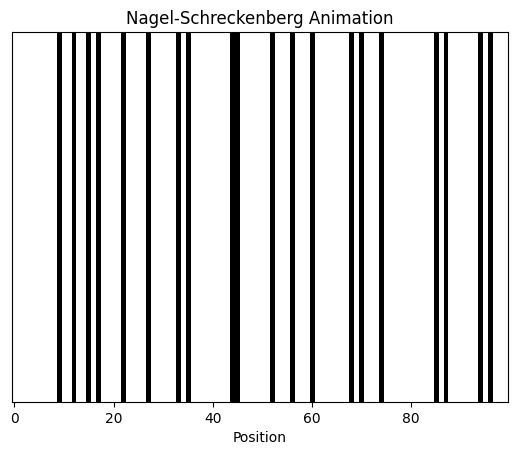

In [7]:
# MP4 Animation Generation
fig, ax = plt.subplots()
img = ax.imshow(road_history[0].reshape(1, -1), cmap='gray_r', interpolation='none', aspect='auto')
ax.set_title("Nagel-Schreckenberg Animation", fontname='IPAPGothic')
ax.set_yticks([])
ax.set_xlabel("Position", fontname='IPAPGothic')

def update(frame):
    img.set_array(road_history[frame].reshape(1, -1))
    return [img]

ani = animation.FuncAnimation(fig, update, frames=steps, interval=100, blit=True)

In [9]:
# Save as movie (FFmpeg is required.)
ani.save("nagel_schreckenberg_animation.gif", writer='pillow', dpi=200)


plt.close()


findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic' not found.
findfont: Font family 'IPAPGothic'